Pipeline Burst thickness calculation

maximum thickness= 10.020919
minimum thickness= 9.973111
    Water depth[m]  Thickness[mm]
0      1500.000000      10.020919
1      1501.010101      10.020436
2      1502.020202      10.019953
3      1503.030303      10.019470
4      1504.040404      10.018987
5      1505.050505      10.018505
6      1506.060606      10.018022
7      1507.070707      10.017539
8      1508.080808      10.017056
9      1509.090909      10.016574
10     1510.101010      10.016091
11     1511.111111      10.015608
12     1512.121212      10.015125
13     1513.131313      10.014642
14     1514.141414      10.014160
15     1515.151515      10.013677
16     1516.161616      10.013194
17     1517.171717      10.012711
18     1518.181818      10.012228
19     1519.191919      10.011745
20     1520.202020      10.011263
21     1521.212121      10.010780
22     1522.222222      10.010297
23     1523.232323      10.009814
24     1524.242424      10.009331
25     1525.252525      10.008849
26     1526.262626      1

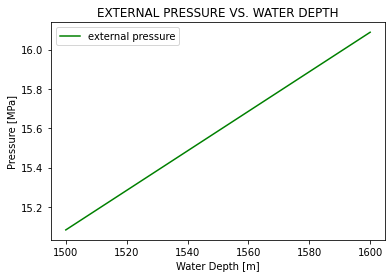

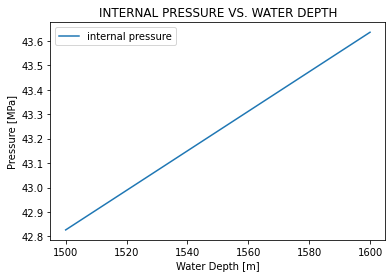

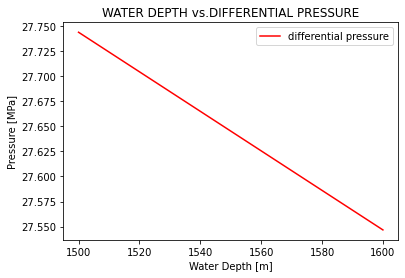

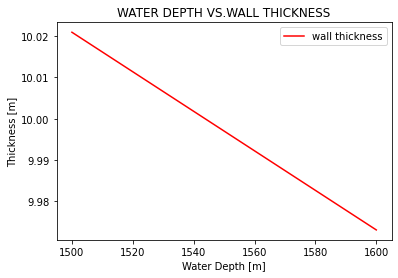

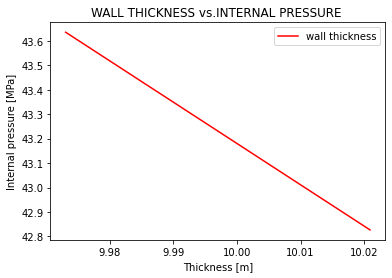

In [1]:
from pipedata import*     #imports all input data from the module pipedata.py
from sympy import*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Range of water depth  
WD = np.linspace(WD_min,WD_max,100)

# Derated yield stress 
def fy(Td):
    if Td < 121:
        fy = 1
    elif 121 < Td <= 149:
        fy = (Td -121)*(-0.033/28) + 1
    elif 149 < Td <= 177:
        fy = (Td -121)*(-0.033/28) + 0.967
    elif 177 < Td <= 204:
        fy = (Td -177)*(-0.033/27) + 0.933
    else:
        fy = (Td -204)*(-0.033/28) + 0.9
    return fy*SMYS

# Allowable hoop stress     
def Sh():
    return fy(Td) * f_hs   

# Internal pressure, Pa
def Pi(WD):
    return (Pd + rho_cont*g*WD)

# External pressure, Pa   
def Pe(WD):
    return (rho_sw*g*WD)

# Differential pressure , Pa     
def P_diff(WD):
    return Pi(WD) - Pe(WD)
    
# BURST thickness calculation
def thick(WD):
    t = symbols('t')
    eq1 = ((P_diff(WD) * (D-t))/(2*t))
    eq2 = ((P_diff(WD) * D)/(2*t))
               
    sol1 = solveset(Eq(eq1,Sh()),t).args[0]
    sol2 = solveset(Eq(eq2,Sh()),t).args[0]
        
    eq1 =  lambdify(t,sol1,'numpy')
    eq2 =  lambdify(t,sol2,'numpy')
        
    if (D/eq1(t))<30:
        t = eq1(t) + CA
    else:
        t = eq2(t) + CA
                   
    return t*1000                        # thickness in mm

# thickness based on range of water depth 
tb = list(round(thick(WD),6) for WD in np.linspace(WD_min,WD_max,100))  
t_max = max(tb)
t_min = min(tb)
print('maximum thickness=',t_max)
print('minimum thickness=',t_min)

#Write result to file
def write_to_file():
    pd.set_option('display.max_rows', 200) # increase no.of rows to a maximum of 200 
    data = pd.DataFrame({'Water depth[m]':WD,'Thickness[mm]':tb})
    print(data)
    file = open('Burst_result.txt','w')
    file.write(str(data))
    return file.close()
write_to_file()


# Plots
def plots():
    # plot water depth and external pressure 
    plt.plot(WD,Pe(WD)/10**6,label='external pressure',color='green')
    plt.title('EXTERNAL PRESSURE VS. WATER DEPTH')
    plt.xlabel('Water Depth [m]')
    plt.ylabel('Pressure [MPa]')
    plt.savefig('fig1.External pressure.png',dpi=100)
    plt.legend()
    plt.show()
  
    # plot water depth and internal pressure
    plt.plot(WD,Pi(WD)/10**6,label='internal pressure')
    plt.title('INTERNAL PRESSURE VS. WATER DEPTH')
    plt.xlabel('Water Depth [m]')
    plt.ylabel('Pressure [MPa]')
    plt.savefig('fig2.Internal pressure.png',dpi=100)
    plt.legend()
    plt.show()
    
    # plot water depth and differential pressure 
    plt.plot(WD,P_diff(WD)/10**6,label='differential pressure',color='r')
    plt.title('WATER DEPTH vs.DIFFERENTIAL PRESSURE')
    plt.xlabel('Water Depth [m]')
    plt.ylabel('Pressure [MPa]')
    plt.savefig('fig3.Water depth vs.Differential pressure.png',dpi=100)
    plt.legend()
    plt.show()
    
    # plot Water depth and thickness 
    plt.plot(WD,tb,label='wall thickness',color='r')
    plt.title('WATER DEPTH VS.WALL THICKNESS')
    plt.xlabel('Water Depth [m]')
    plt.ylabel('Thickness [m]')
    plt.savefig('fig4. Water depth vs. Burst thickness.png',dpi=100)
    plt.legend()
    plt.show()
    
    # plot thickness and internal pressure 
    plt.plot(tb,Pi(WD)/10**6,label='wall thickness',color='r')
    plt.title('WALL THICKNESS vs.INTERNAL PRESSURE ')
    plt.xlabel('Thickness [m]')
    plt.ylabel('Internal pressure [MPa]')
    plt.savefig('fig5.Thickness vs.Internal pressure.png',dpi=100)
    plt.legend()
    plt.show()
plots()